<a href="https://colab.research.google.com/github/ivanlaurer/ProyectoDS-Laurer/blob/main/ProyectoDSParteI_Laurer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ProyectoDSParteI - Laurer**

## ABSTRACT

Este proyecto analiza el comportamiento de clientes de una empresa de telecomunicaciones utilizando el dataset Telco Customer Churn. El conjunto de datos incluye información sobre servicios contratados, tiempo de permanencia, cargos mensuales y el estado de los clientes (activos o dados de baja). El objetivo principal es comprender los factores asociados al abandono de clientes y detectar patrones que puedan ayudar a mejorar la retención.

La rotación de clientes representa un problema importante para las empresas de servicios, ya que perder clientes implica reducción de ingresos y mayores costos de adquisición. A través del análisis exploratorio y visualizaciones, se estudian variables clave como la permanencia, los cargos económicos y los servicios de internet y telefonía.

Se utilizan gráficos univariados para observar distribuciones generales y gráficos bivariados para analizar relaciones entre variables y el estado del cliente. Además, se incluyen resúmenes estadísticos para complementar el análisis visual.

Las hipótesis principales plantean que los clientes con menor tiempo de permanencia presentan mayor probabilidad de abandono, que los cargos mensuales elevados se asocian a mayor rotación y que ciertos servicios de internet muestran mayor tasa de baja.

Los resultados permiten obtener conclusiones relevantes para la toma de decisiones comerciales, como la necesidad de implementar estrategias de retención temprana y revisar planes con costos elevados. Este análisis busca servir como base para futuras acciones orientadas a mejorar la fidelización de clientes.

## CARGA DATASET TELCO-CUSTOMER-CHURN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar desde GitHub
url = "https://raw.githubusercontent.com/ivanlaurer/proyecto-python-datasets/main/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df = df.rename(columns={"Churn": "Abandono"})
df = df.rename(columns={"tenure": "Permanencia"})
df = df.rename(columns={"MonthlyCharges": "CargosMensuales"})
df = df.rename(columns={"TotalCharges": "CargosTotales"})
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Permanencia,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## PREGUNTAS

### 1- ¿La mayor cantidad de abandono de clientes se dá en los primeros meses?
### 2- ¿La baja de clientes está relacionada al cargo de los servicios?
### 3- ¿Hay servicios que son aquellos que presentan una mayor deserción de clientes?
### 4- ¿La combinación de tiempo de permanencia y costos impacta en la pérdida de clientes?

## HIPÓTESIS

### H1: Los clientes con pocos meses de permanencia presentan mayor probabilidad de baja.

### H2: A mayores cargos mensuales, mayor probabilidad de abandono.

### H3: Los clientes con internet de fibra óptica muestran mayor rotación.

### H4: La combinación de baja permanencia y altos cargos incrementa el riesgo de pérdida.

## Gráficos set...

In [ ]:
sns.set_theme(
    style="darkgrid",
    rc={
        "axes.facecolor": "#1e1e1e",
        "figure.facecolor": "#1e1e1e",
        "axes.labelcolor": "white",
        "text.color": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "#444444"
    }
)

## GRÁFICOS MATPLOTLIB

### Clientes activos vs pérdidos

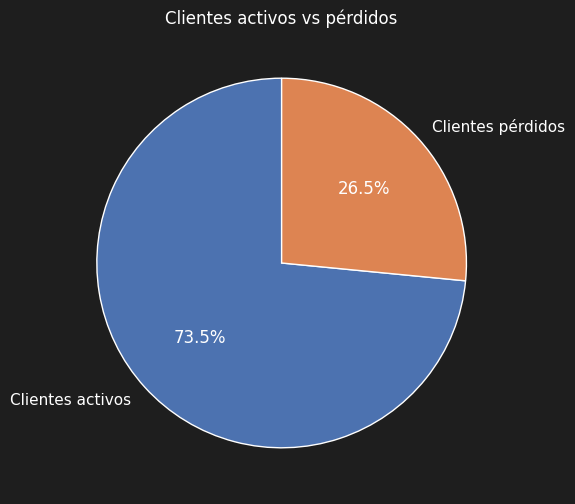

,count
Abandono,
No,5174
Yes,1869


In [ ]:
churn_counts = df["Abandono"].value_counts() # Contar clientes por Abandono

labels = ["Clientes activos", "Clientes pérdidos"]

plt.figure(figsize=(6,6))
plt.pie(
    churn_counts.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Clientes activos vs pérdidos")
plt.show()
df["Abandono"].value_counts()

El gráfico de torta muestra que la mayoría de los clientes permanecen activos, aunque existe una proporción significativa de clientes que abandonan el servicio, lo que representa una oportunidad de mejora en estrategias de retención.

### Distribución de cargos mensuales

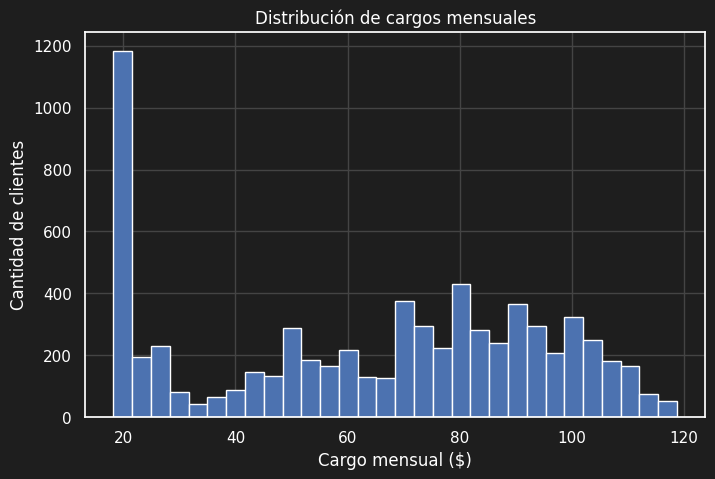

,CargosMensuales
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["CargosMensuales"], bins=30)
plt.grid(True)
plt.xlabel("Cargo mensual ($)")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de cargos mensuales")
plt.show()
df["CargosMensuales"].describe()

Este gráfico permite comprender la estructura de ingresos de la empresa y sirve como base para analizar cómo los costos se relacionan con la baja de clientes. La presencia de muchos clientes en rangos de cargos elevados sugiere que los precios podrían ser un factor relevante en la rotación.

### Evolución de clientes según tiempo de permanencia



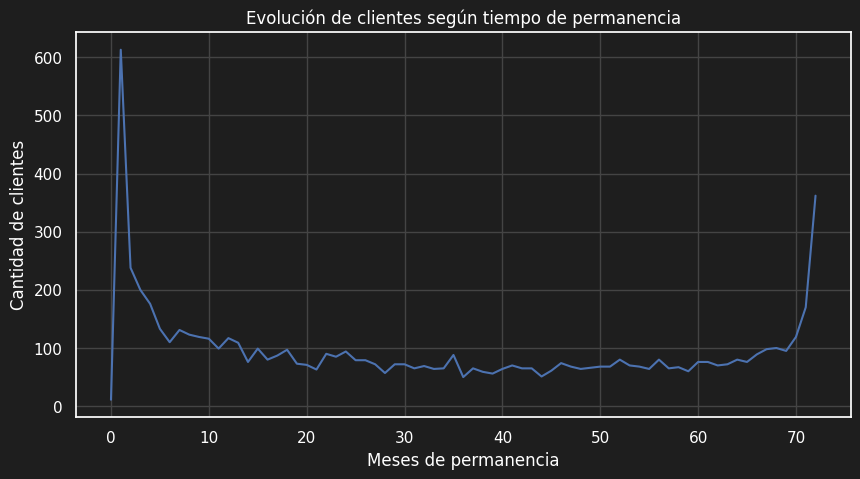

,mean,median,min,max
Abandono,,,,
No,37.569965,38.0,0,72
Yes,17.979133,10.0,1,72


In [ ]:
tenure_counts = df["Permanencia"].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(tenure_counts.index, tenure_counts.values)
plt.grid(True)
plt.xlabel("Meses de permanencia")
plt.ylabel("Cantidad de clientes")
plt.title("Evolución de clientes según tiempo de permanencia")
plt.show()
df.groupby("Abandono")["Permanencia"].agg(["mean", "median", "min", "max"])

El gráfico muestra que una gran parte de los clientes tiene baja permanencia en la empresa, concentrándose en los primeros meses de servicio. A medida que aumenta el tiempo de antigüedad, disminuye la cantidad de clientes, lo que indica una alta rotación inicial.

## GRÁFICOS SEABORN

### Distribución permanencia según estado del cliente

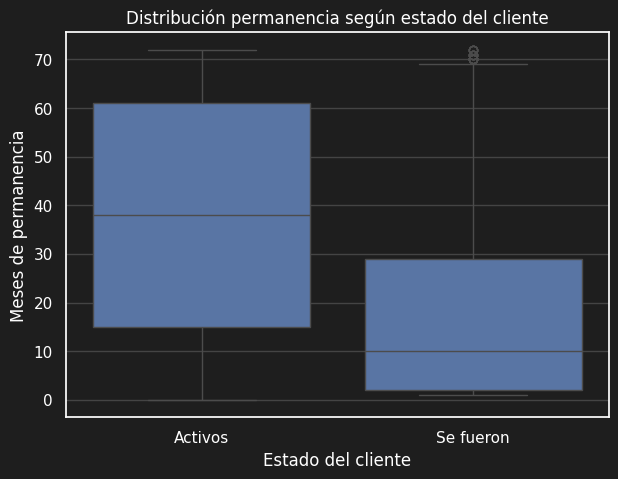

,mean,median,min,max
Abandono,,,,
No,37.569965,38.0,0,72
Yes,17.979133,10.0,1,72


In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Abandono", y="Permanencia", data=df)
plt.xticks([0,1], ["Activos", "Se fueron"])
plt.xlabel("Estado del cliente")
plt.ylabel("Meses de permanencia")
plt.title("Distribución permanencia según estado del cliente")
plt.show()
df.groupby("Abandono")["Permanencia"].agg(["mean", "median", "min", "max"])

Los clientes que abandonaron el servicio presentan una permanencia significativamente menor que los clientes activos, lo que indica que el abandono ocurre principalmente en los primeros meses.

### Cargos mensuales según estado del cliente

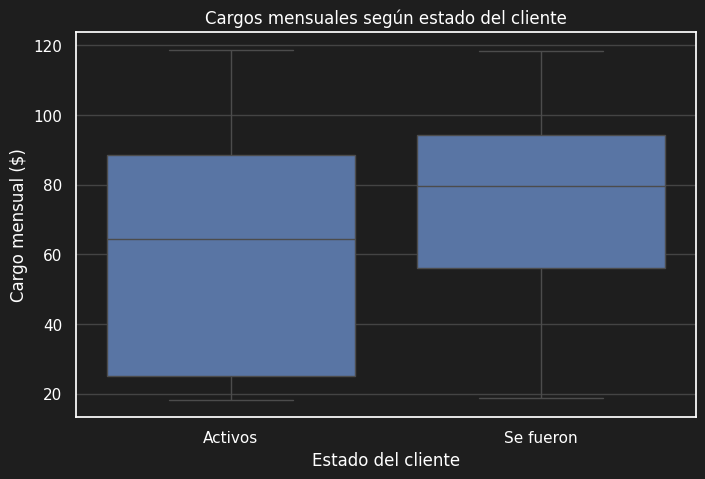

,mean,median,min,max
Abandono,,,,
No,61.265124,64.425,18.25,118.75
Yes,74.441332,79.650,18.85,118.35


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Abandono", y="CargosMensuales", data=df)
plt.xticks([0,1], ["Activos", "Se fueron"])
plt.xlabel("Estado del cliente")
plt.ylabel("Cargo mensual ($)")
plt.title("Cargos mensuales según estado del cliente")
plt.show()
df.groupby("Abandono")["CargosMensuales"].agg(["mean", "median", "min", "max"])

Los clientes que se fueron tenían, en promedio, mayores cargos mensuales que los clientes activos, lo que indica que el costo del servicio podría influir en el abandono.

### Clientes según servicio de internet

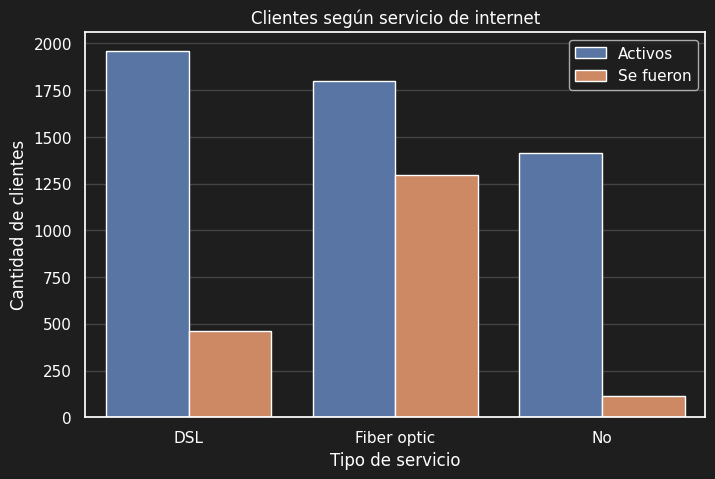

Abandono,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="InternetService", data=df, hue="Abandono")
plt.xlabel("Tipo de servicio")
plt.ylabel("Cantidad de clientes")
plt.title("Clientes según servicio de internet")
plt.legend(labels=["Activos", "Se fueron"]) # Cambiar nombre de la leyenda
plt.show()
pd.crosstab(df["InternetService"], df["Abandono"])

El gráfico muestra que los clientes con servicio de fibra óptica presentan una mayor cantidad de abandonos en comparación con otros tipos de internet, mientras que los clientes sin servicio de internet presentan menor abandono.

## CONCLUSIÓN

En el análisis de los gráficos propuestos se puede confirmar los supuestos planteados. La mayor cantidad de abandonos se da en los primeros meses, por lo que habría que enfocarse en estrategias que aseguren una mayor permanencia de la nueva clientela. Además, se observa que el costo de los servicios es un factor importante: asegurar que las personas estén pagando un precio que consideren justo es de vital importancia para lograr un servicio satisfactorio que evite la deserción. Finalmente, el servicio en el cual se debe hacer mayor foco es la fibra óptica, ya que es el responsable de la mayor cantidad de deserciones de la compañía.